# Regression Tutorial

## Project Description
+ Heavy metals contaminate the restoration sites of decommissioned nuclear power plants. Developing a novel absorbent for removing radionuclides from aqueous environments is critical these days. Conduct a regression to evaluate the adsorption isotherm of cobalt ions onto the hydroxyapatite beads.

## Simple Description
+ Read csv
+ Do linear regression for each independent column
+ Do multiple linear regression
+ Evaluate each model by comparing actual value and predicted value
    * Use Mean Squared Error & $R^2$ value

In [1]:
import pandas as pd

In [2]:
# Read Data
path = 'Rawdata/AdsorptionCobaltHydroxyapatite.csv'
df = pd.read_csv(path)
print(df.head())

   Temperature (K)  Co (mg/L)  qe (mg/g)
0              239       0.00       0.00
1              239       0.03       0.10
2              239       0.21       0.48
3              239       0.48       0.92
4              239       1.14       1.44


In [3]:
# Arrange Data
X1 = df['Temperature (K)']
X2 = df['Co (mg/L)']
Y = df['qe (mg/g)']

print(X1)

0     239
1     239
2     239
3     239
4     239
5     239
6     239
7     303
8     303
9     303
10    303
11    303
12    303
13    303
14    313
15    313
16    313
17    313
18    313
19    313
20    313
Name: Temperature (K), dtype: int64


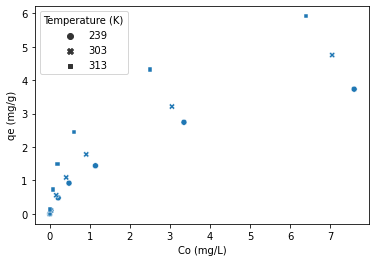

In [4]:
# Plot data

import matplotlib.pyplot as plt
import seaborn as sns

markers = {239: 'o', 303: 'x', 313: '+' }

sns.scatterplot(data = pd.concat([X1, X2, Y], axis = 1), x = 'Co (mg/L)', y = 'qe (mg/g)', style = 'Temperature (K)')
plt.show()

In [5]:
# Divde dataset based on Temperature to apply different regression model
df_239 = df[df['Temperature (K)'] == 239]
df_303 = df[df['Temperature (K)'] == 303]
df_313 = df[df['Temperature (K)'] == 313]

X_239 = df_239['Co (mg/L)']
Y_239 = df_239['qe (mg/g)']

X_303 = df_303['Co (mg/L)']
Y_303 = df_303['qe (mg/g)']

X_313 = df_313['Co (mg/L)']
Y_313 = df_313['qe (mg/g)']

In [6]:
# Linear Regression & Evaluation based on MSE & Rsquare
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

line_fitter = LinearRegression()

ln_239 = line_fitter.fit(X_239.values.reshape(-1, 1), Y_239)
print('Regression when K = 239: ')
print('slope: ', ln_239.coef_[0])
print('intercept: ', ln_239.intercept_)
ln_239_pred = line_fitter.predict(X_239.values.reshape(-1, 1))
print('MeanSquarError K=293: ', mean_squared_error(Y_239, ln_239_pred))
print('Rsquare K=293: ', r2_score(Y_239, ln_239_pred))
print('-------------------------------------------')
ln_303 = line_fitter.fit(X_303.values.reshape(-1, 1), Y_303)
print('Regression when K = 303: ')
print('slope: ',ln_303.coef_)
print('intercept: ', ln_303.intercept_)
re_X303 = X_303.values.reshape(-1, 1)
ln_303_pred = line_fitter.predict(re_X303)
print('MeanSquarError K=303: ', mean_squared_error(Y_303, ln_303_pred))
print('Rsquare K=303: ', r2_score(Y_303, ln_303_pred))
print('-------------------------------------------')
ln_313 = line_fitter.fit(X_313.values.reshape(-1, 1), Y_313)
print('Regression when K = 313: ')
print('slope: ',ln_313.coef_)
print('intercept: ', ln_313.intercept_)
re_X313 = X_313.values.reshape(-1, 1)
ln_313_pred = line_fitter.predict(re_X313)
print('MeanSquarError K=313: ', mean_squared_error(Y_313, ln_313_pred))
print('Rsquare K=313: ', r2_score(Y_313, ln_313_pred))



Regression when K = 239: 
slope:  0.4774191768261624
intercept:  0.47060862069383713
MeanSquarError K=293:  0.17032109868525475
Rsquare K=293:  0.9000728723131308
-------------------------------------------
Regression when K = 303: 
slope:  [0.64702535]
intercept:  0.5682908096585235
MeanSquarError K=303:  0.23113622679124163
Rsquare K=303:  0.9134167710488228
-------------------------------------------
Regression when K = 313: 
slope:  [0.86653793]
intercept:  0.9393227228772287
MeanSquarError K=313:  0.656121026197752
Rsquare K=313:  0.84733459256677


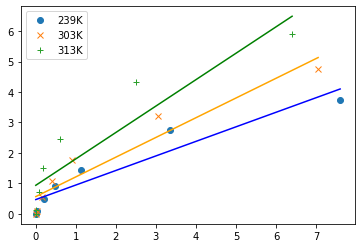

In [7]:
# Plot the result at once

plt.plot(X_239, Y_239, 'o', X_303, Y_303, 'x', X_313, Y_313, '+')

plt.plot(X_239, ln_239_pred, c = 'blue')
plt.plot(X_303, ln_303_pred, c = 'orange')
plt.plot(X_313, ln_313_pred, c = 'green')

plt.legend(['239K', '303K', '313K'])

In [9]:
# Do multiple linear regression
X = pd.concat([X1, X2], axis = 1)
mul_fitter = LinearRegression()
mul_fitter.fit(X, Y)
print(mul_fitter.coef_, mul_fitter.intercept_)

[0.0116708  0.63910757] -2.6551055018924385


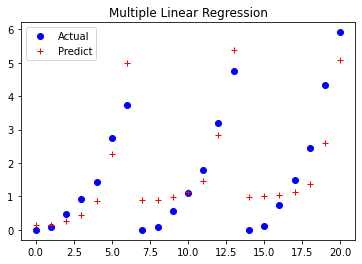

In [10]:
# Plot actual value & predicted value
mul_predict = mul_fitter.predict(X)

plt.plot(Y, 'o', color = 'blue')
plt.plot(mul_predict, '+', color = 'red')
plt.legend(['Actual', 'Predict'])
plt.xlabel = ('Actual Value')
plt.ylabel = ('Predicted Value')
plt.title("Multiple Linear Regression")
plt.show()


In [11]:
# Get R^2 score

print(mul_fitter.score(X, Y))

0.8174735340285425
